In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing, Holt
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv('gold_monthly_csv.csv')
df

,Date,Price
0,1950-01,34.730
1,1950-02,34.730
2,1950-03,34.730
3,1950-04,34.730
4,1950-05,34.730
...,...,...
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032


In [10]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
      --------------------------------------- 0.1/9.2 MB 2.8 MB/s eta 0:00:04
     - -------------------------------------- 0.3/9.2 MB 3.8 MB/s eta 0:00:03
     - -------------------------------------- 0.4/9.2 MB 4.2 MB/s eta 0:00:03
     -- ------------------------------------- 0.6/9.2 MB 4.0 MB/s eta 0:00:03
     --- ------------------------------------ 0.7/9.2 MB 3.7 MB/s eta 0:00:03
     --- ------------------------------------ 0.7/9.2 MB 3.3 MB/s eta 0:00:03
     --- ------------------------------------ 0.8/9.2 MB 3.1 MB/s eta 0:00:03
     --- ------------------------------------ 0.8/9.2 MB 2.8 MB/s eta 0:00:03
     --- ------------------------------------ 0.9/9.2 MB 2.5 MB/s eta 0:00:04
     --- ------------------------------------ 0.9/9.2 MB 2.6 MB/s eta 0:00:04
     --- ------------------------------------ 0.9/9.2 MB 2.6 MB/s eta 0


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
print(f"Date range of gold prices available from {df.iloc[:,0][0]} to {df.iloc[:,0][len(df)-1]}")

Date range of gold prices available from 1950-01 to 2020-07


In [17]:
date = pd.date_range(start='1/1/1950',end='8/1/2020',freq='M')
len(date)

847

In [18]:
df['Date']

0      1950-01
1      1950-02
2      1950-03
3      1950-04
4      1950-05
        ...   
842    2020-03
843    2020-04
844    2020-05
845    2020-06
846    2020-07
Name: Date, Length: 847, dtype: object

In [19]:
df['month'] = date
df.drop('Date',axis=1,inplace = True)
df = df.set_index('month')
df

,Price
month,
1950-01-31,34.730
1950-02-28,34.730
1950-03-31,34.730
1950-04-30,34.730
1950-05-31,34.730
...,...
2020-03-31,1593.764
2020-04-30,1680.030
2020-05-31,1715.697


Text(0.5, 1.0, 'Gold price from 1950 to 2020')

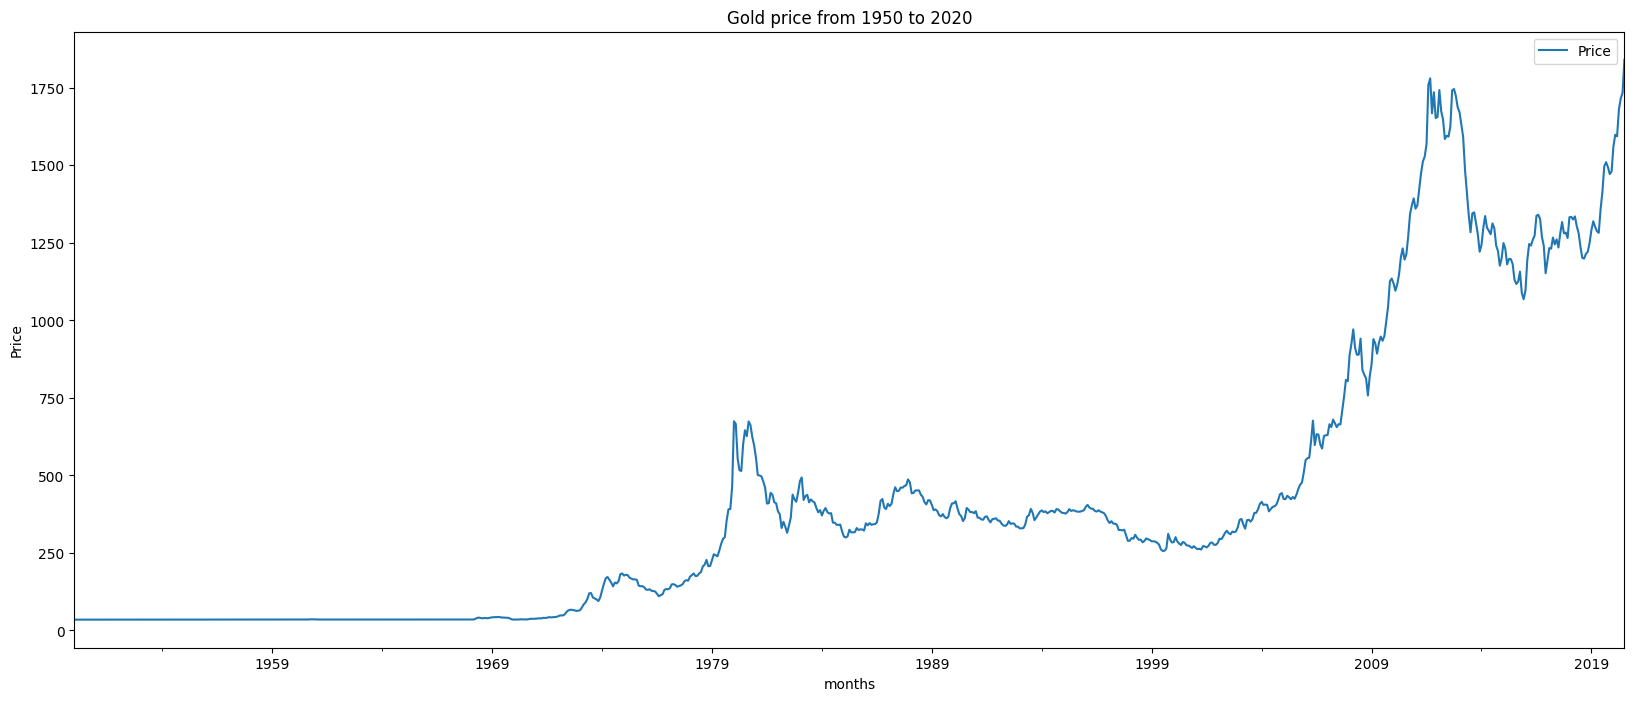

In [20]:
df.plot(figsize = (20,8))
plt.xlabel("months")
plt.ylabel('Price')
plt.title("Gold price from 1950 to 2020")

In [21]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


In [22]:
df.isnull().sum()

Price    0
dtype: int64

Text(0, 0.5, 'Price')

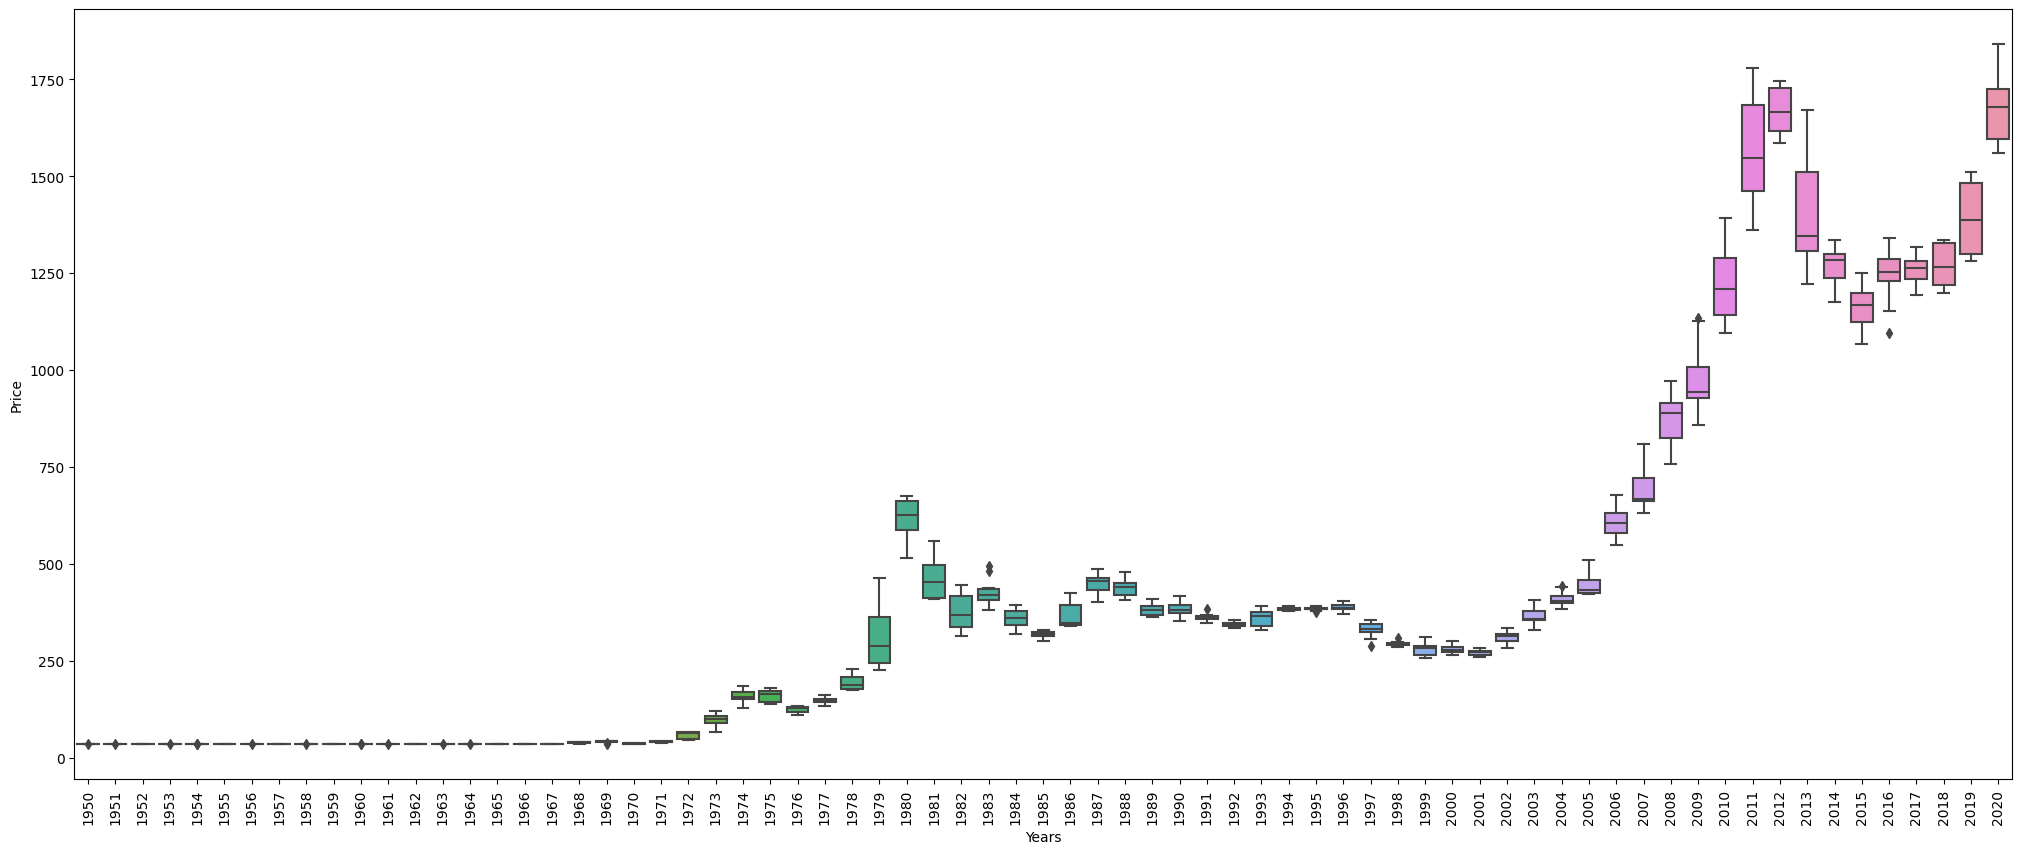

In [23]:
_,ax=plt.subplots(figsize = (25,10))
sns.boxplot(x=df.index.year,y=df.values[:,0],ax=ax)
plt.xticks(rotation=90)
plt.xlabel("Years")
plt.ylabel('Price')

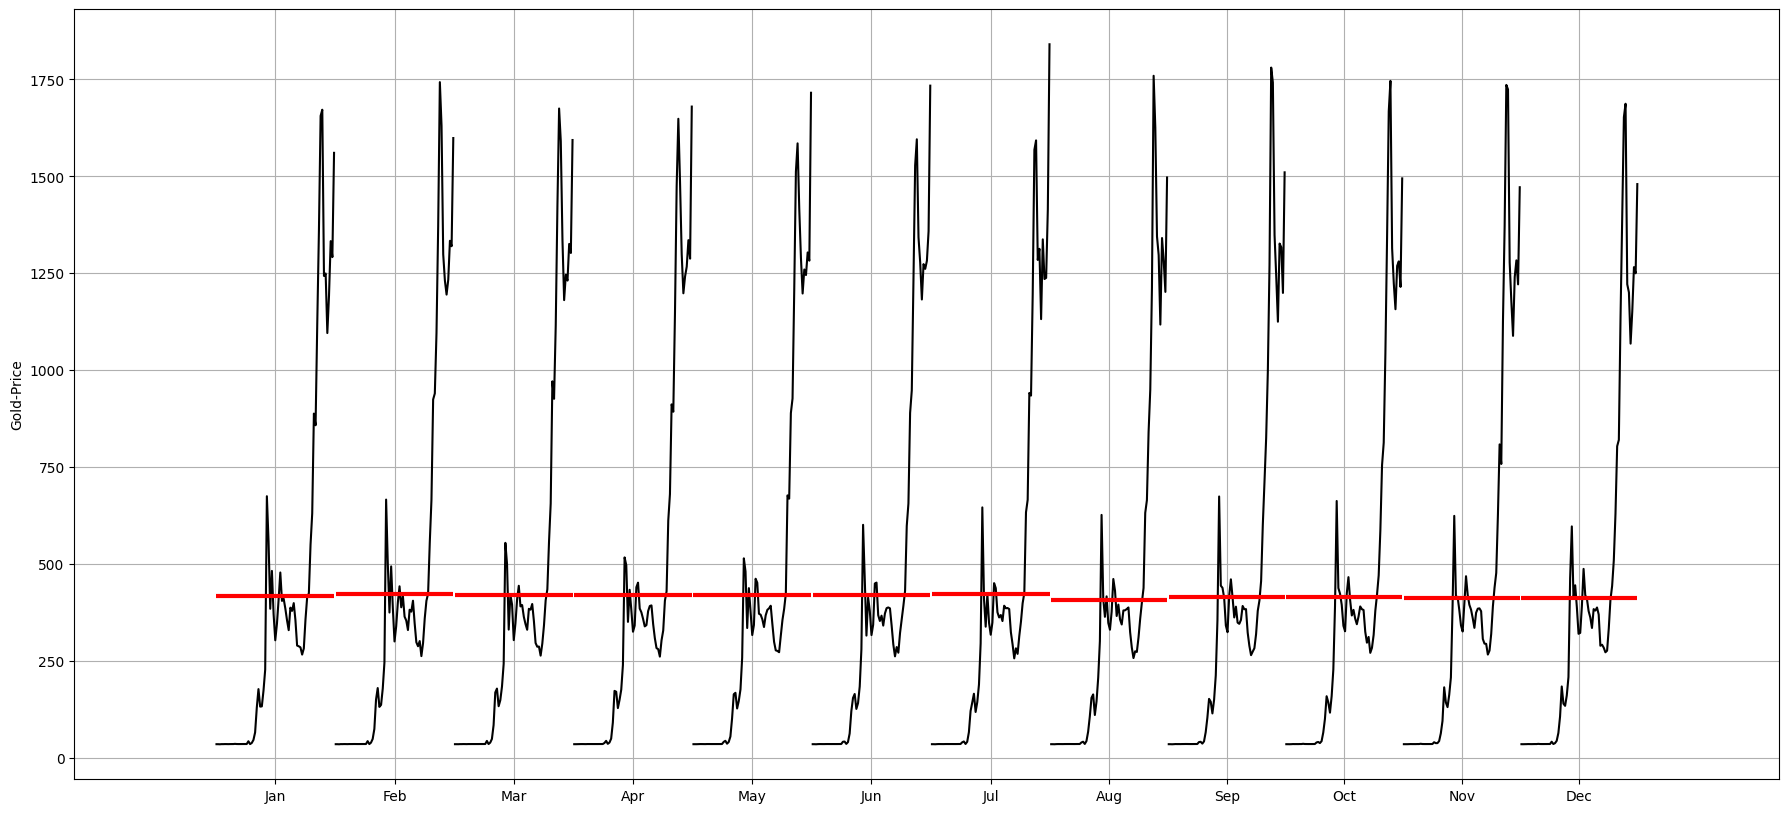

In [24]:
from statsmodels.graphics.tsaplots import month_plot

fig,ax = plt.subplots(figsize=(22,10))
month_plot(df, ylabel='Gold-Price', ax=ax)
plt.grid()

Text(0, 0.5, 'Price')

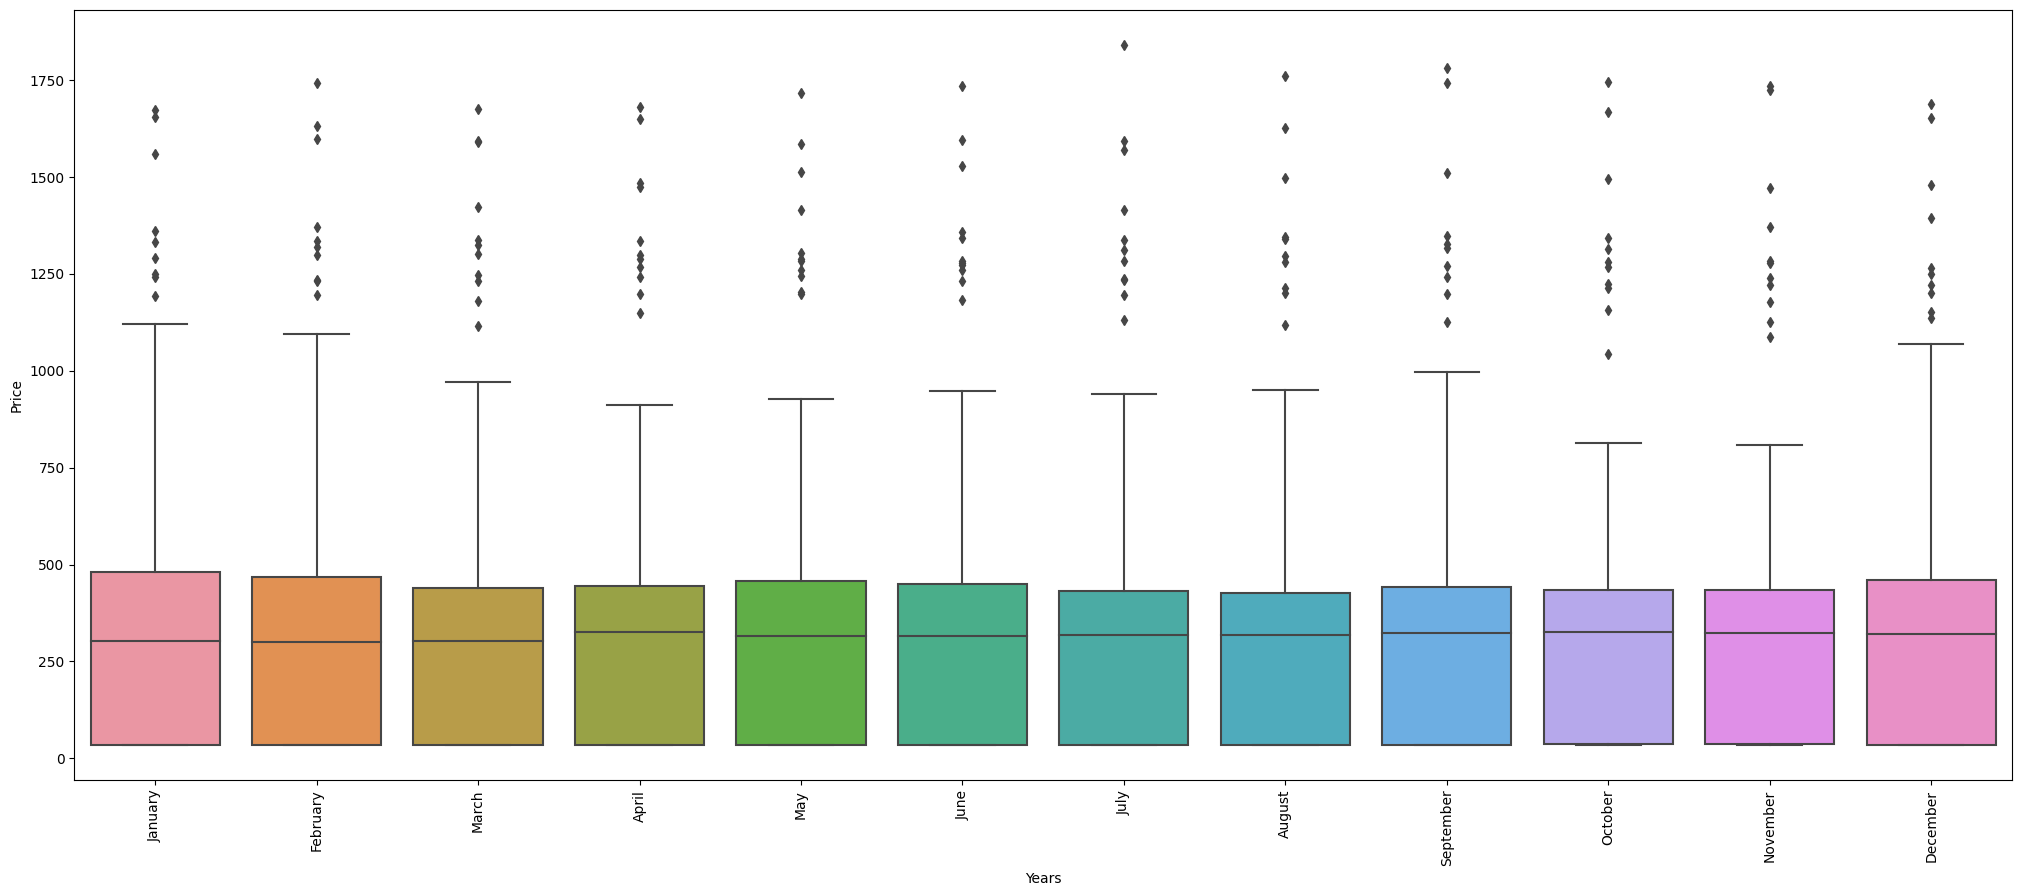

In [25]:
_,ax=plt.subplots(figsize = (25,10))
sns.boxplot(x=df.index.month_name(),y=df.values[:,0],ax=ax)
plt.xticks(rotation=90)
plt.xlabel("Years")
plt.ylabel('Price')

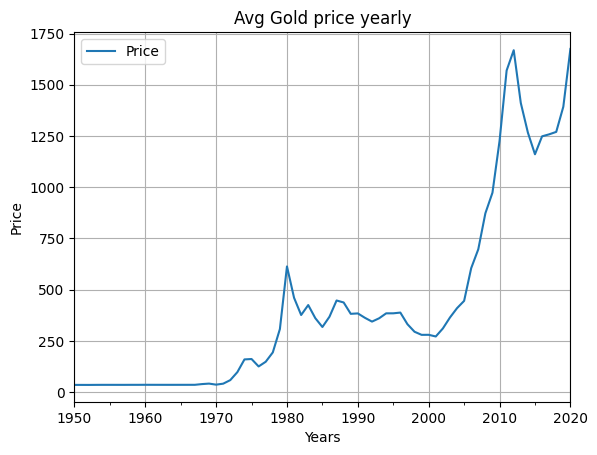

In [26]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot()
plt.xlabel("Years")
plt.ylabel('Price')
plt.title("Avg Gold price yearly")
plt.grid()

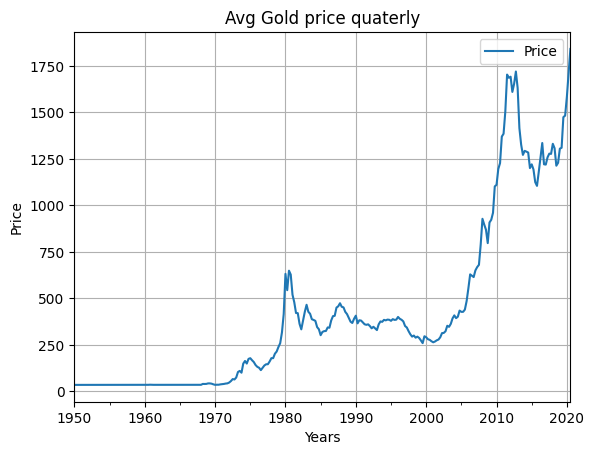

In [27]:
df_quaterly_sum = df.resample('Q').mean()
df_quaterly_sum.plot()
plt.xlabel("Years")
plt.ylabel('Price')
plt.title("Avg Gold price quaterly")
plt.grid()

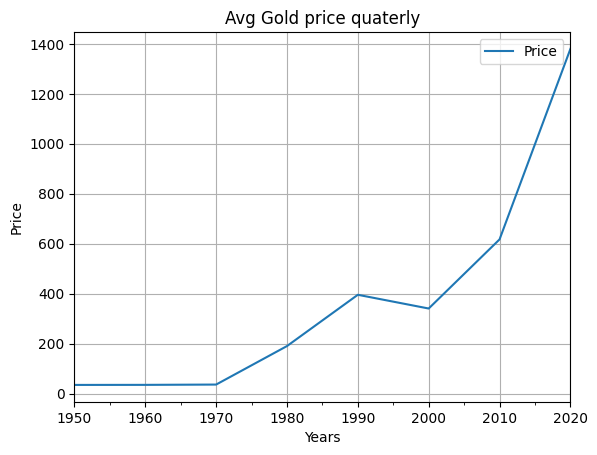

In [28]:
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot()
plt.xlabel("Years")
plt.ylabel('Price')
plt.title("Avg Gold price quaterly")
plt.grid()

In [29]:
df_1 = df.groupby(df.index.year).mean().rename(columns ={'Price':'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns ={'Price':'Std'}), left_index = True, right_index = True)
df_1['Cov_pct'] = ((df_1['Std']/df_1['Mean'])*100).round(2)
df_1.head(9)

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24
1955,35.023333,0.034728,0.10
1956,34.987500,0.031079,0.09
1957,34.947500,0.039801,0.11
1958,35.091667,0.027247,0.08


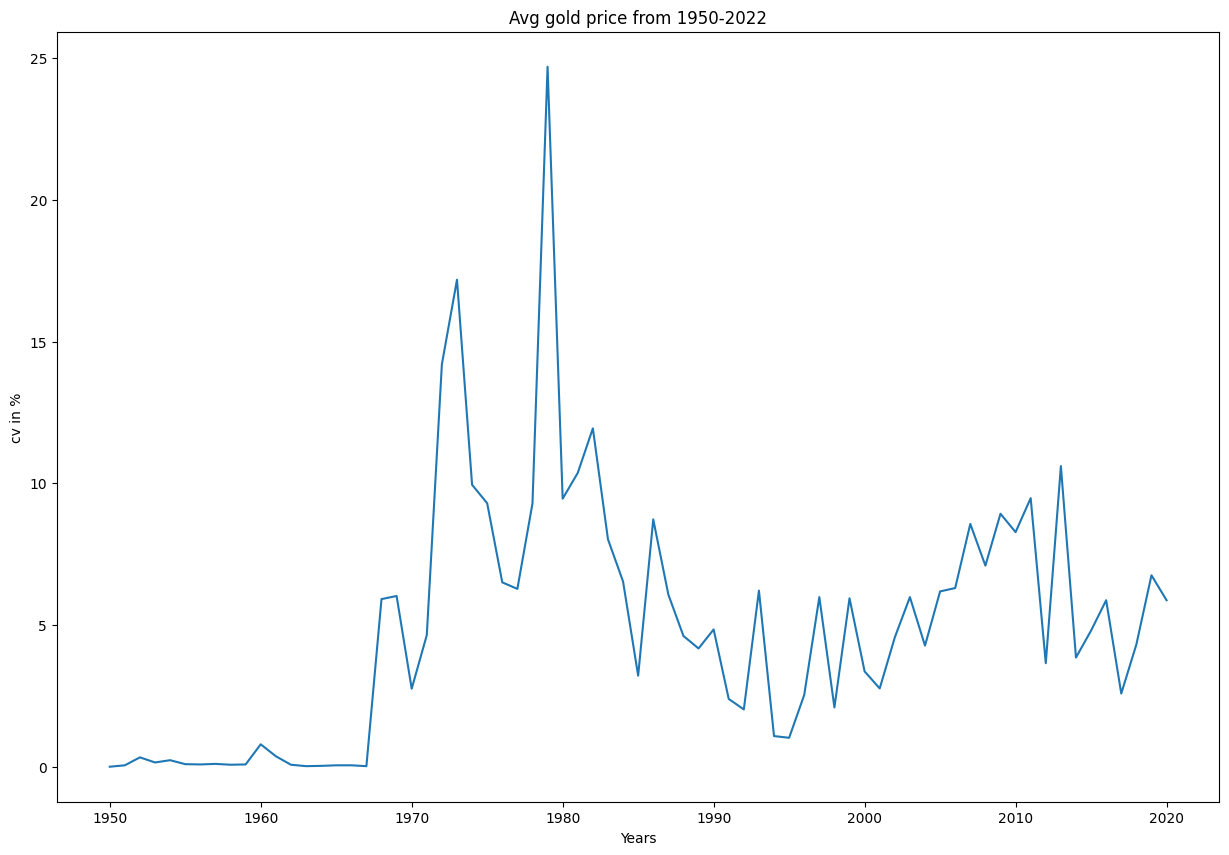

In [30]:
fig,ax = plt.subplots(figsize=(15,10))
df_1['Cov_pct'].plot()
plt.title('Avg gold price from 1950-2022')
plt.xlabel("Years")
plt.ylabel('cv in %')
plt.show()

In [101]:
train = df[df.index.year<=2015]
test = df[df.index.year>2015]


In [102]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


In [103]:
len(train)/len(df)

0.935064935064935

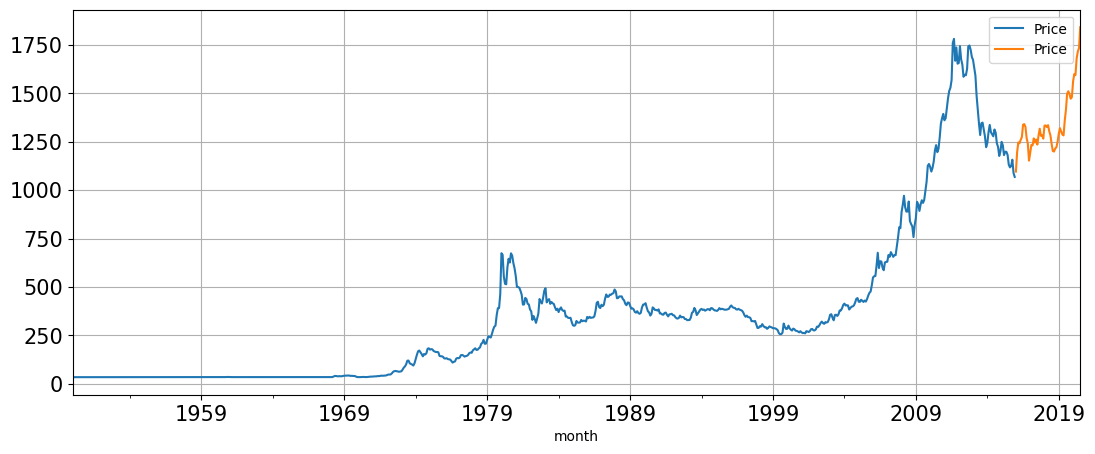

In [104]:
train['Price'].plot(figsize=(13,5),fontsize=15)
test['Price'].plot(figsize=(13,5),fontsize=15)
plt.grid()
plt.legend()

In [105]:
train_time = [i+1 for i in range (len(train))]
test_time = [i+(len(train)) for i in range (len(test))]
len(train),len(test)

(792, 55)

In [106]:
LR_train = train.copy()
LR_test = test.copy()

In [107]:
LR_train['time'] = train_time
LR_test['time'] = test_time

In [108]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LR_train[['time']],train['Price'].values)

LinearRegression()

In [109]:
test_prediction = lr.predict(LR_test[['time']])
test['forcast']=test_prediction

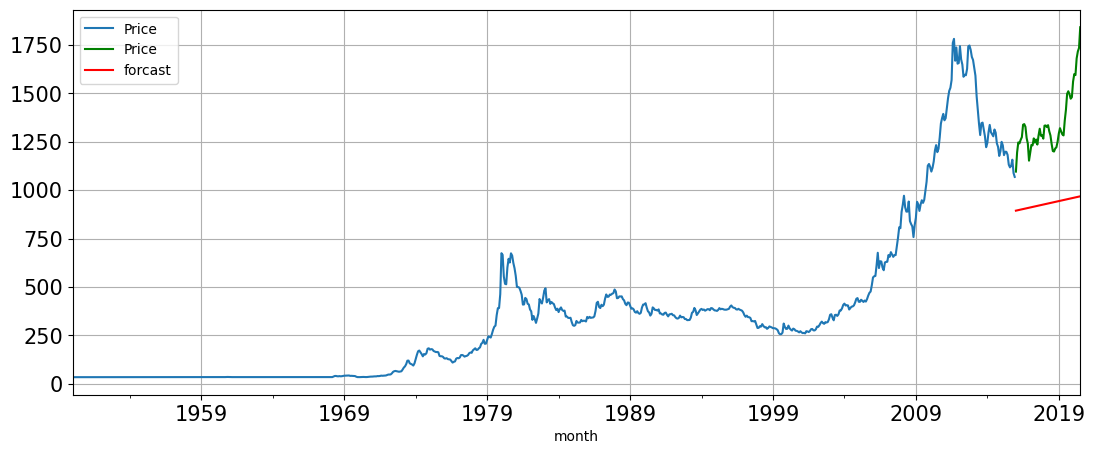

In [110]:
plt.figure(figsize=(14,6))
train['Price'].plot(figsize=(13,5),fontsize=15)
test['Price'].plot(figsize=(13,5),fontsize=15,color='Green')
test['forcast'].plot(figsize=(13,5),fontsize=15,color='Red')
plt.grid()
plt.legend()

In [111]:
def mape(actual, pred):
    return round((np.mean(abs(actual - pred)/actual))*100,2)

In [112]:
mape_module_test = mape(test["Price"].values,test_prediction)

In [113]:
mape_module_test

29.86

In [120]:
final_model = ExponentialSmoothing(df,
                                  trend = 'additive',
                                  seasonal = 'additive').fit(smoothing_level = 0.4,
                                                            smoothing_trend = 0.3,
                                                            smoothing_seasonal = 0.6)

In [121]:
pred_df

,Prediction
2016-01-31,1052.357339
2016-02-29,958.367997
2016-03-31,850.810840
2016-04-30,778.097125
2016-05-31,688.579486
2016-06-30,602.766971
2016-07-31,531.554462
2016-08-31,522.346800
2016-09-30,539.917670
2016-10-31,577.434337


In [122]:
mape_final_model = mape_module_test = mape(df["Price"].values,final_model.fittedvalues)
mape_final_model

17.24

In [131]:
pred = final_model.forecast(steps = len(test))
pred.head()

2020-08-31    1792.869955
2020-09-30    1723.454279
2020-10-31    1646.714189
2020-11-30    1584.902935
2020-12-31    1567.469952
Freq: M, dtype: float64

In [132]:
pred_df = pd.DataFrame({'Prediction':pred})


Text(0.5, 1.0, 'Gold price from 1950 to 2020')

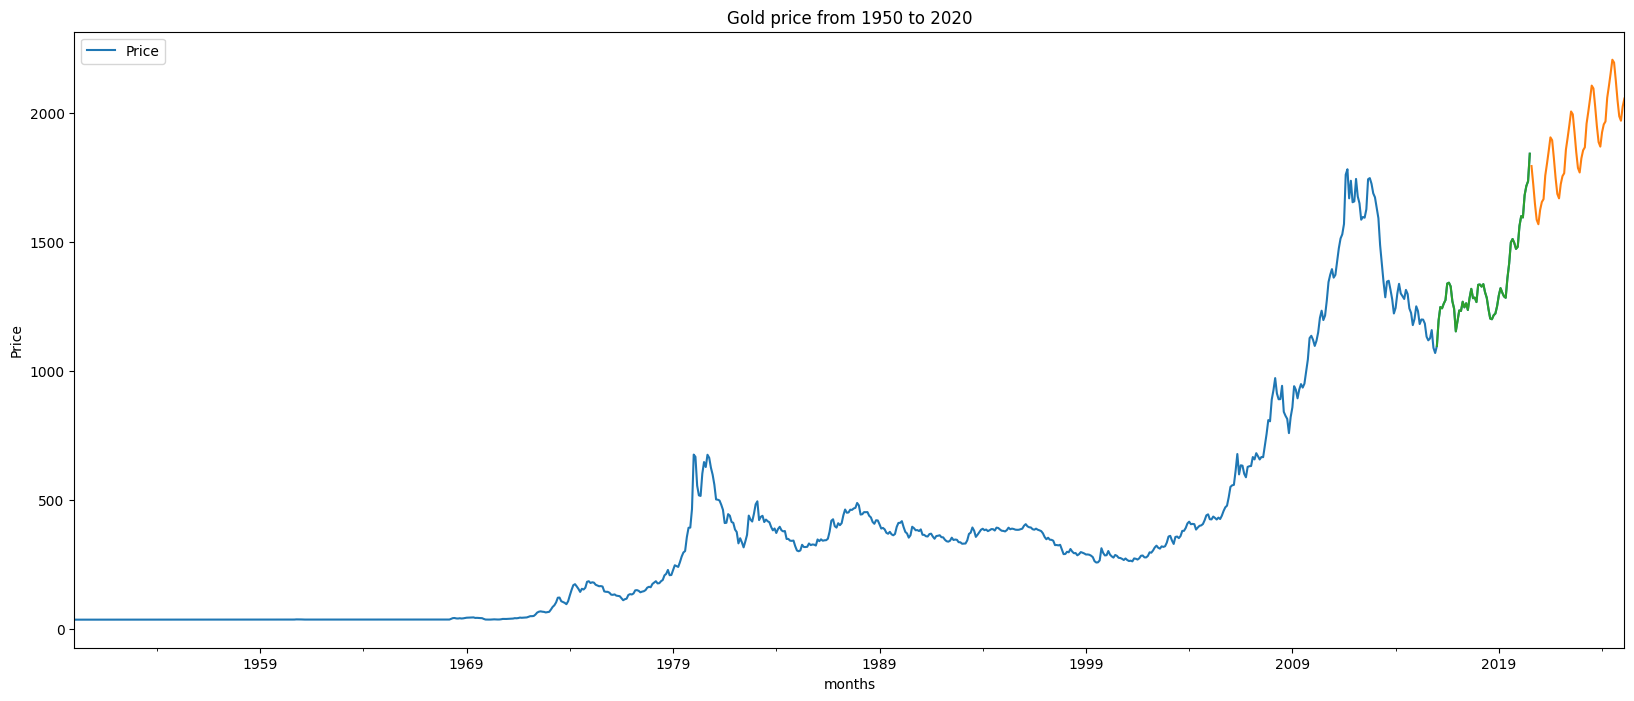

In [133]:
df.plot(figsize = (20,8))
pred_df['Prediction'].plot()
test['Price'].plot()
plt.xlabel("months")
plt.ylabel('Price')
plt.title("Gold price from 1950 to 2020")